In [84]:
%matplotlib inline
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from pandas.plotting import scatter_matrix 
tf.reduce_retracing=True

In [85]:
df = pd.read_csv('V1.csv', index_col=0)
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,NaN,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,NaN,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Избавимся от текстовых данных

In [86]:
df = df.drop(['Email', 'Address'], axis=1)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avatar                500 non-null    object 
 1   Avg. Session Length   500 non-null    float64
 2   Time on App           500 non-null    float64
 3   Time on Website       244 non-null    float64
 4   Length of Membership  500 non-null    float64
 5   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 27.3+ KB


In [88]:
df['Avatar'].unique

<bound method Series.unique of 0                Violet
1             DarkGreen
2                Bisque
3           SaddleBrown
4      MediumAquaMarine
             ...       
495                 Tan
496       PaleVioletRed
497            Cornsilk
498                Teal
499         DarkMagenta
Name: Avatar, Length: 500, dtype: object>

Признак Avatar представляет так же текстовый признак и от него можно избавиться

In [89]:
df = df.drop(['Avatar'], axis=1)

Построим матрицу корреляции для оставшихся (числовых) признаков и оценим их влияение на целевой признак Yearly Amount Spent

In [90]:
df['Time on Website'].fillna(0, inplace=True)

C:\Users\mkiri\AppData\Local\Temp\ipykernel_868\1580956358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time on Website'].fillna(0, inplace=True)


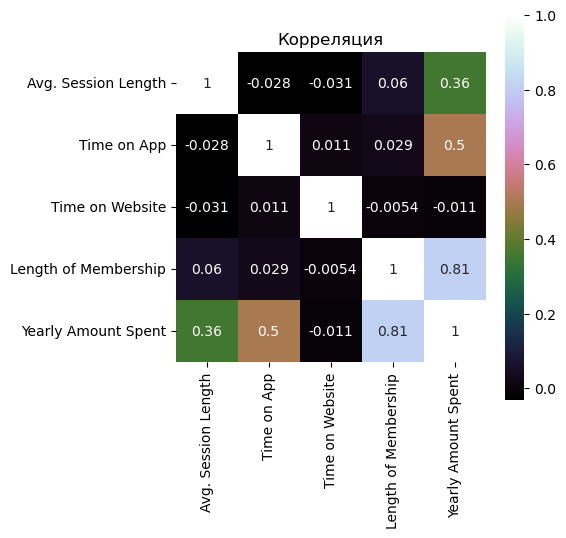

Yearly Amount Spent     1.000000
Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website        -0.010971
Name: Yearly Amount Spent, dtype: float64

In [91]:
corr = df.corr()
plt.figure(figsize=(5,5))
plt.title("Корреляция")
sns.heatmap(corr, vmax=1, square=True, annot = True, cmap='cubehelix')
plt.show()
corr["Yearly Amount Spent"].sort_values(ascending=False)

Все признаки оказывают существенное влияние на целевой признак

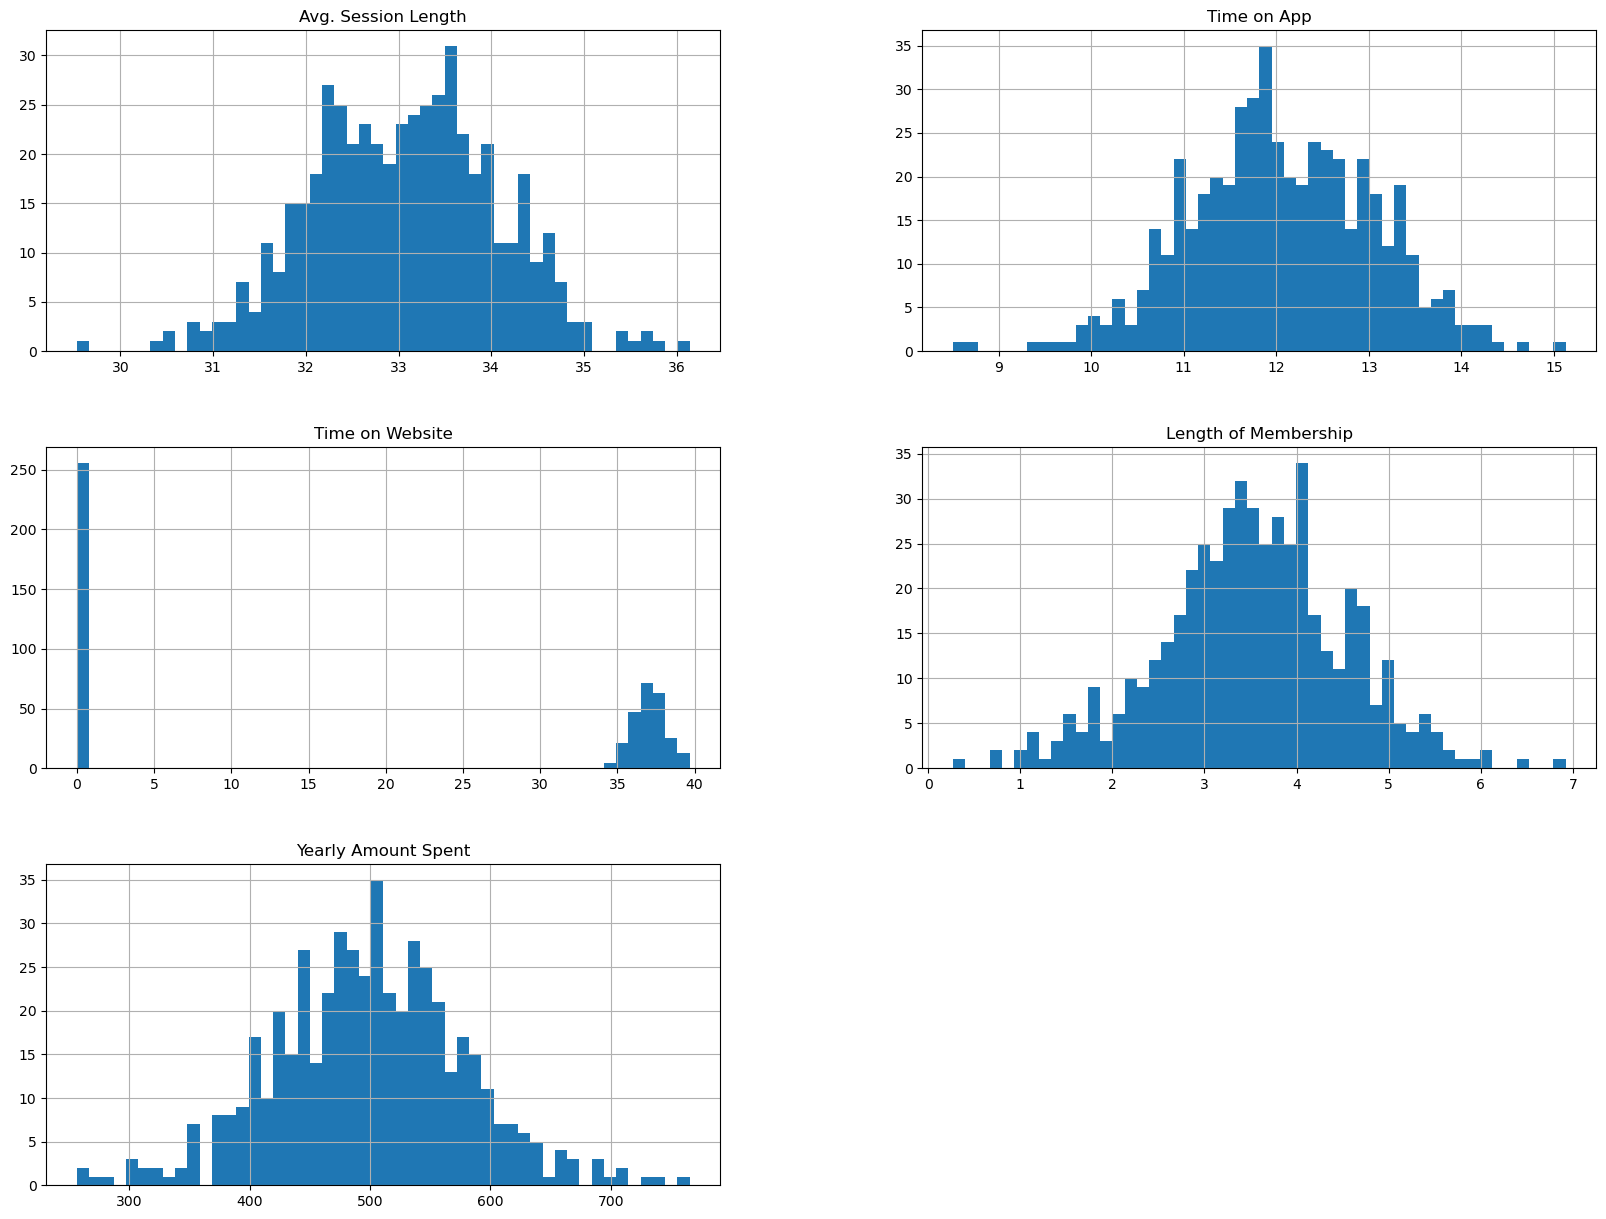

In [92]:
df.hist(bins=50,figsize=(20,15))
plt.show()

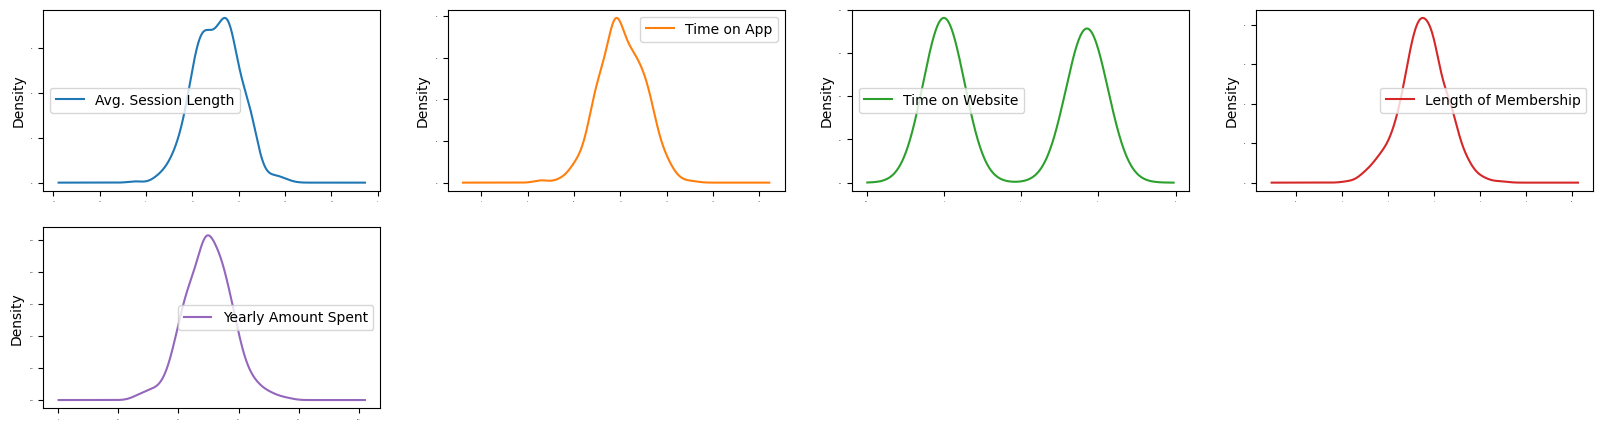

In [93]:
df.plot(kind='density', subplots=True, layout=(3,4), sharex=False, legend=True, fontsize=1, figsize=(20,8))
plt.show()

По гистограммам и графикам плотности можно сделать вывод, что распределение всех признаков, примерно соответствует нормальному

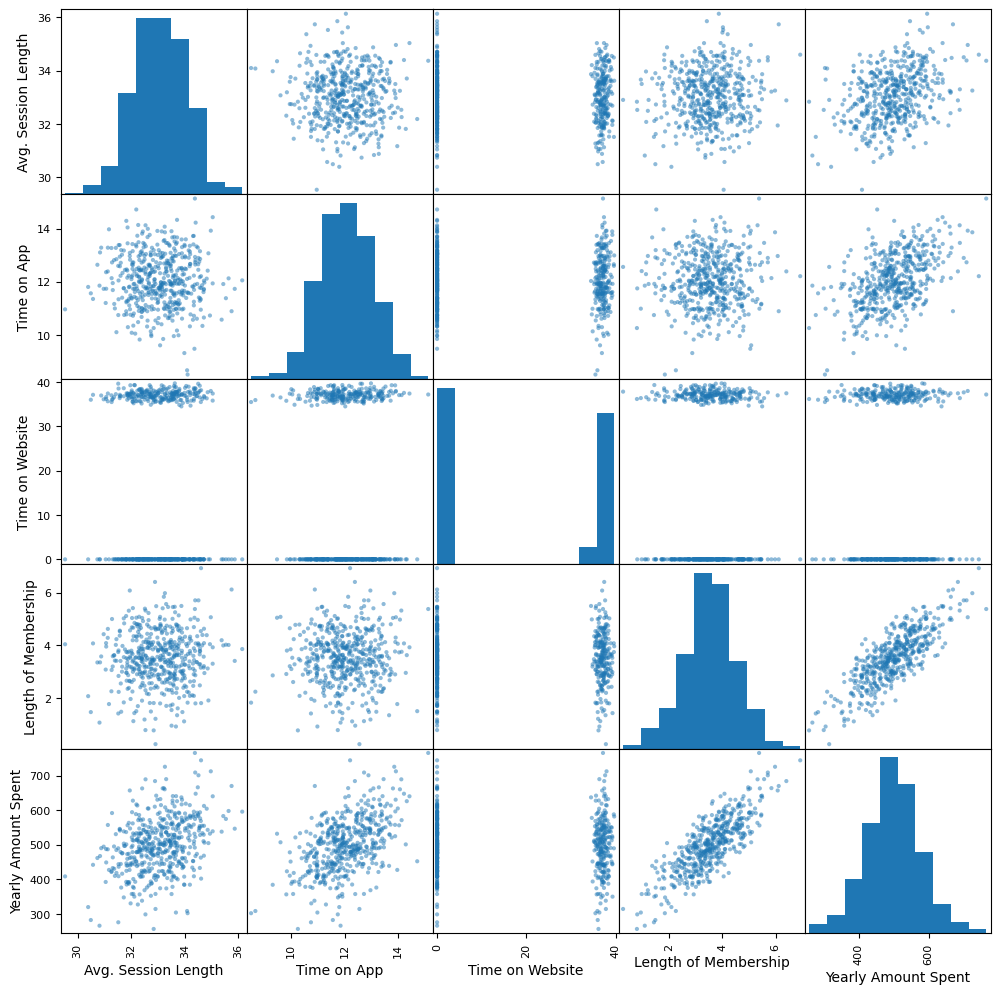

In [94]:
scatter_matrix(df, figsize=(12,12))
plt.show()

Все признаки хорошо коррелируют с целевым

In [95]:
X = df.drop(['Yearly Amount Spent'], axis=1)
Y = df['Yearly Amount Spent']

X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,0.000000,4.104543
3,34.305557,13.717514,0.000000,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,0.000000,3.746573
496,34.702529,11.695736,0.000000,3.576526
497,32.646777,11.499409,0.000000,4.958264
498,33.322501,12.391423,36.840086,2.336485


Мы создали исходный датасет. Создадим построенный, путём создания дополнительных признаков 

In [96]:
df["Total time"] = df["Time on Website"] + df["Time on App"]

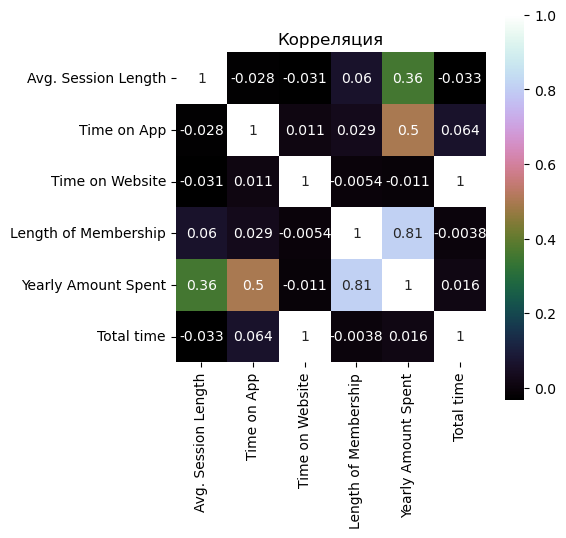

Yearly Amount Spent     1.000000
Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Total time              0.015750
Time on Website        -0.010971
Name: Yearly Amount Spent, dtype: float64

In [97]:
corr = df.corr()
plt.figure(figsize=(5,5))
plt.title("Корреляция")
sns.heatmap(corr, vmax=1, square=True, annot = True, cmap='cubehelix')
plt.show()
corr["Yearly Amount Spent"].sort_values(ascending=False)

Как можно заметить, созданный признак имеет влияение на целевой

In [98]:
X_with_new_atribbute = df.drop(['Yearly Amount Spent'], axis=1)
Y_with_new_atribbute = df['Yearly Amount Spent']

Используя MinMaxScaler выполним масштабирование построенного и исходного датасета в диапазон от 0 до 1

In [99]:
scaler = MinMaxScaler(feature_range = (0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(Y.values.reshape(-1, 1))

X_with_new_atribbute_scaled = scaler.fit_transform(X_with_new_atribbute)
Y_with_new_atribbute_scaled = scaler.fit_transform(Y_with_new_atribbute.values.reshape(-1, 1))

X_scaled

array([[0.75142474, 0.62662002, 0.99760734, 0.57310099],
       [0.36230641, 0.39301565, 0.93941328, 0.35986913],
       [0.52495281, 0.42637758, 0.        , 0.57639624],
       ...,
       [0.47135427, 0.45193054, 0.        , 0.70472157],
       [0.57362466, 0.58669942, 0.92860297, 0.3106342 ],
       [0.63317755, 0.5908369 , 0.        , 0.37056019]])

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.4, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_train_extra, X_test_extra, y_train_extra, y_test_extra = train_test_split(X_with_new_atribbute_scaled, Y_with_new_atribbute_scaled, test_size=0.2, random_state=42)
X_test_extra, X_dev_extra, y_test_extra, y_dev_extra = train_test_split(X_test_extra, y_test_extra, test_size=0.5, random_state=42)

Создадим обучающу, валидационную и тестовую выборку. Поскольку размер датасета небольшой, размер обучающей выборки равен 60%, размер тестовой выборки равен 20% и размер валидационной выборки тоже 20% 

In [137]:
X_test_extra.shape[1]

5

In [138]:
model_dense = Sequential()
model_dense.add(Input(shape=(X_train.shape[1],)))
model_dense.add(Dense(units=64))
model_dense.add(Dense(units=32))
model_dense.add(Dense(units=1))

model_2_dense = Sequential()
model_2_dense.add(Input(shape=(X_train_extra.shape[1],)))
model_2_dense.add(Dense(units=64))
model_2_dense.add(Dense(units=32))
model_2_dense.add(Dense(units=1))

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1]).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1]).astype('float32') 

model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(filters=32, kernel_size=1))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(1000))
model.add(Dense(1))

X_train_extra = X_train_extra.reshape(X_train_extra.shape[0], 1, X_train_extra.shape[1]).astype('float32')
X_test_extra = X_test_extra.reshape(X_test_extra.shape[0], 1, X_test_extra.shape[1]).astype('float32') 

model_2 = Sequential()
model_2.add(Input(shape=(X_train_extra.shape[1], X_train_extra.shape[2])))
model_2.add(Conv1D(filters=32, kernel_size=1))
model_2.add(MaxPooling1D(pool_size=1))
model_2.add(Flatten())
model_2.add(Dense(1000))
model_2.add(Dense(1))

Создадим 4 модели
model - сверточная модель для данных без дополнительных параметров
model_2 - сверточная модель для данных с дополнительным параметром
model_dense - полносвязная модель для данных без дополнительных параметров
model_2_dense - полносвязная модель для данных с дополнительным параметром
Выполним обучения каждой модели на датасете без масштабирования и с масштабированием

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.4, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [140]:
X_train.shape[1]

4

In [141]:
model_dense.compile(optimizer='adam', loss='mean_squared_error')
history = model_dense.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_data=(X_dev, y_dev))
mse = model_dense.evaluate(X_test, y_test)
predicted = model_dense.predict(X_test)
r2 = r2_score(y_test, predicted)
print(f'Dense, scaled mse: {mse}, r2: {r2}')

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1]).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1]).astype('float32') 
X_dev = X_dev.reshape(X_dev.shape[0], 1, X_dev.shape[1]).astype('float32') 

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_data=(X_dev, y_dev))
mse = model.evaluate(X_test, y_test)
predicted = model.predict(X_test)
r2 = r2_score(y_test, predicted)
print(f'Conv, scaled mse: {mse}, r2: {r2}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9562e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Dense, scaled mse: 0.0005621202290058136, r2: 0.9763225771875688
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9008e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Conv, scaled mse: 0.0007526266854256392, r2: 0.9682981347194158


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_with_new_atribbute_scaled, Y_with_new_atribbute_scaled, test_size=0.4, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [143]:
model_2_dense.compile(optimizer='adam', loss='mean_squared_error')
history = model_2_dense.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_data=(X_dev, y_dev))
mse = model_2_dense.evaluate(X_test, y_test)
predicted = model_2_dense.predict(X_test)
r2 = r2_score(y_test, predicted)
print(f'Dense, scaled, extra mse: {mse}, r2: {r2}')

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1]).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1]).astype('float32') 
X_dev = X_dev.reshape(X_dev.shape[0], 1, X_dev.shape[1]).astype('float32') 

model_2.compile(optimizer='adam', loss='mean_squared_error')
history = model_2.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_data=(X_dev, y_dev))
mse = model_2.evaluate(X_test, y_test)
predicted = model_2.predict(X_test)
r2 = r2_score(y_test, predicted)
print(f'Conv, scaled, extra mse: {mse}, r2: {r2}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1429e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Dense, scaled, extra mse: 0.00040142275975085795, r2: 0.9830914194758632
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4621e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Conv, scaled, extra mse: 0.0008240743190981448, r2: 0.9652886463217779


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [152]:
model_dense.compile(optimizer='adam', loss='mean_squared_error')
history = model_dense.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_data=(X_dev, y_dev))
mse = model_dense.evaluate(X_test, y_test)
predicted = model_dense.predict(X_test)
r2 = r2_score(y_test, predicted)
print(f'Dense mse: {mse}, r2: {r2}')

X_train = np.array(X_train)
X_test = np.array(X_test)
X_dev = np.array(X_dev)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1]).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1]).astype('float32') 
X_dev = X_dev.reshape(X_dev.shape[0], 1, X_dev.shape[1]).astype('float32') 

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_data=(X_dev, y_dev))
mse = model.evaluate(X_test, y_test)
predicted = model.predict(X_test)
r2 = r2_score(y_test, predicted)
print(f'Conv mse: {mse}, r2: {r2}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1038.6733
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Dense mse: 1063.8695068359375, r2: 0.8269316804622746
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 952.6839 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Conv mse: 986.753173828125, r2: 0.8394768361091438


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_with_new_atribbute, Y_with_new_atribbute, test_size=0.5, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [154]:
model_2_dense.compile(optimizer='adam', loss='mean_squared_error')
history = model_2_dense.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_data=(X_dev, y_dev))
mse = model_2_dense.evaluate(X_test, y_test)
predicted = model_2_dense.predict(X_test)
r2 = r2_score(y_test, predicted)
print(f'Dense, extra mse: {mse}, r2: {r2}')

X_train = np.array(X_train)
X_test = np.array(X_test)
X_dev = np.array(X_dev)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1]).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1]).astype('float32') 
X_dev = X_dev.reshape(X_dev.shape[0], 1, X_dev.shape[1]).astype('float32') 

model_2.compile(optimizer='adam', loss='mean_squared_error')
history = model_2.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_data=(X_dev, y_dev))
mse = model_2.evaluate(X_test, y_test)
predicted = model_2.predict(X_test)
r2 = r2_score(y_test, predicted)
print(f'Conv, extra mse: {mse}, r2: {r2}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1133.9238
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Dense, extra mse: 1169.16357421875, r2: 0.8064322798913195
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1418.5151 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Conv, extra mse: 1420.0440673828125, r2: 0.7648963109222181


Как можно заметить, лучший результат показала полносвязная нейронная сеть с массштабированием и дополнительным признаком
Для неё проведём Grid поиск параметров: количество нейронов в слое, количество эпох, лучший оптимизатор

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_with_new_atribbute_scaled, Y_with_new_atribbute_scaled, test_size=0.4, random_state=42)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
Deg = [2,3,4,5,6,7]
res = []
res_r2 = []
names = []
for deg in Deg:
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(units=2**deg))
    model.add(Dense(units=2**(deg-1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_data=(X_dev, y_dev))
    rmse = model.evaluate(X_test, y_test)
    predicted = model.predict(X_test)
    r2 = r2_score(y_test, predicted)
    res.append(rmse)
    res_r2.append(r2)
    names.append(deg)
    print("Deg = ", deg)
    print("RMSE = ", rmse)
    print("R2 = ", r2, "\n-----------------")
print ("RMSEs: ", res)
print ("Names: ", names)
print ("R2s: ", res_r2)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0111 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Deg =  2
RMSE =  0.011957472190260887
R2 =  0.4963317972299186 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8507e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Deg =  3
RMSE =  0.00045767982373945415
R2 =  0.9807217793652945 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4030e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Deg =  4
RMSE =  0.0005196845158934593
R2 =  0.9781100418367549 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5664e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Deg =  5
RMSE =  0.0004291828954592347
R2 =  0.9819221123644666 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0672e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Deg =  6
RMSE =  0.00039191648829728365
R2 =  0.9834918395579444 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9246e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Deg =  7
RMSE =  0

Точность при 16, 32, 64, 128 нейронах достигается высокая. Самое высокое значение R2 и минимальное RMSE при 64 нейронах

In [159]:
Epohs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
res = []
res_r2 = []
names = []
for ep in Epohs:
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(units=128))
    model.add(Dense(units=64))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_data=(X_dev, y_dev))
    rmse = model.evaluate(X_test, y_test)
    predicted = model.predict(X_test)
    r2 = r2_score(y_test, predicted)
    res.append(rmse)
    res_r2.append(r2)
    names.append(ep)
    print("Epohs = ", ep)
    print("RMSE = ", rmse)
    print("R2 = ", r2, "\n-----------------")
print ("RMSEs: ", res)
print ("Names: ", names)
print ("R2s: ", res_r2)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4182e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epohs =  10
RMSE =  0.0008175397524610162
R2 =  0.9655638861104799 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1645e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epohs =  20
RMSE =  0.0005038980743847787
R2 =  0.9787749906103179 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2462e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epohs =  30
RMSE =  0.0004012511926703155
R2 =  0.9830986436481978 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2409e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epohs =  40
RMSE =  0.0004910146235488355
R2 =  0.9793176613585737 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2069e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epohs =  50
RMSE =  0.00040227241697721183
R2 =  0.983055627801642 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoh

Точность при 100 эпохах самая лучая

In [161]:
Opts = ['adam', 'SGD', 'Adamax']
res = []
res_r2 = []
names = []
for op in Opts:
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(units=128))
    model.add(Dense(units=64))
    model.add(Dense(units=1))
    model.compile(optimizer=op, loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_data=(X_dev, y_dev))
    rmse = model.evaluate(X_test, y_test)
    predicted = model.predict(X_test)
    r2 = r2_score(y_test, predicted)
    res.append(rmse)
    res_r2.append(r2)
    names.append(op)
    print("Ops = ", op)
    print("RMSE = ", rmse)
    print("R2 = ", r2, "\n-----------------")
print ("RMSEs: ", res)
print ("Names: ", names)
print ("R2s: ", res_r2)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4200e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Ops =  adam
RMSE =  0.00042298235348425806
R2 =  0.9821832936951698 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Ops =  SGD
RMSE =  0.0011476310901343822
R2 =  0.9516599090839114 
-----------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6328e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Ops =  Adamax
RMSE =  0.0005306871025823057
R2 =  0.977646592111517 
-----------------
RMSEs:  [0.00042298235348425806, 0.0011476310901343822, 0.0005306871025823057]
Names:  ['adam', 'SGD', 'Adamax']
R2s:  [0.9821832936951698, 0.9516599090839114, 0.977646592111517]


Лучший результат показывает оптимизатор adam

Итоговая модель, с лучшими гиперпараметрами выглядит так:
- Полносвязная модель, использующая данные с масштабированием и дополнительным признаком
- Оптимизатор adam
- Количество эпох для обучения 100
- Количество нейронов в первом и втором слоях соответсвенно: 64, 32

Построим данную модель и вычислим её точность по метрике MSE и R2

In [162]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(units=64))
model.add(Dense(units=32))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0, validation_data=(X_dev, y_dev))
rmse = model.evaluate(X_test, y_test)
predicted = model.predict(X_test)
r2 = r2_score(y_test, predicted)

print("RMSE = ", rmse)
print("R2 = ", r2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0544e-04 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE =  0.0003868506755679846
R2 =  0.9837052181138394


Итоговые значение RMSE и R2 для данной модели: 0.0003 и 0.9837 соответсвенно